# 1.Importing Essential Library

In [747]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# 2.Importing Dataset and overview

In [748]:
data1 = pd.read_csv('telecom_customer_churn.csv')

In [749]:
data1.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [750]:
data1.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# 3.Data Cleaning

In [751]:
from tabulate import tabulate
def missingvaluesin_table(data):
    # percentage of missingvalue
    total_percentage_missing = (((data.isnull() | data.isna() | (data == '') | (data == '0')).sum().sum()/ (data.size)) * 100).round(2)
    print("Total missing values in percentage:",total_percentage_missing,"%")
    
    # count missing values
    missing_values=(data.isnull() | data.isna() | (data == '') | (data == '0')).sum()
    # missing values in percentage
    missing_in_percentage=((missing_values/len(data))*100).round(2)
    
    # creating dataframe to show in tabulate view
    temp={"missing count":missing_values,"missing values in %":missing_in_percentage}
    temp_data=pd.DataFrame(temp)
    #print table
    print(tabulate(temp_data,headers='keys',tablefmt='pretty'))
missingvaluesin_table(data1)

Total missing values in percentage: 11.53 %
+-----------------------------------+---------------+---------------------+
|                                   | missing count | missing values in % |
+-----------------------------------+---------------+---------------------+
|            Customer ID            |      0.0      |         0.0         |
|              Gender               |      0.0      |         0.0         |
|                Age                |      0.0      |         0.0         |
|              Married              |      0.0      |         0.0         |
|       Number of Dependents        |      0.0      |         0.0         |
|               City                |      0.0      |         0.0         |
|             Zip Code              |      0.0      |         0.0         |
|             Latitude              |      0.0      |         0.0         |
|             Longitude             |      0.0      |         0.0         |
|        Number of Referrals        |      0

In [752]:
data1

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [753]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [754]:
data1['Internet Type'].isna().sum()

1526

In [755]:
def count_func(i):
    count = data1[i == "No"].shape[0]

# Alternatively, using .loc
    count = data1.loc[i == "No"].shape[0]

# Print the result
    print(f"Count : {count}")

count_func(data1['Phone Service'])

Count : 682


In [756]:
data1.loc[data1['Internet Service'] == 'No' , 'Avg Monthly GB Download'] = data1.loc[data1['Internet Service'] == 'No' , 'Avg Monthly GB Download'].fillna(0.0)

In [757]:
data1.loc[data1['Phone Service'] == 'No' , 'Avg Monthly Long Distance Charges'] =data1.loc[data1['Phone Service'] == 'No' , 'Avg Monthly Long Distance Charges'].fillna(0.0)

In [758]:
net_dependent_features = ['Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']
data1.loc[data1['Internet Service'] == 'No',net_dependent_features] = data1.loc[data1['Internet Service'] == 'No',net_dependent_features].fillna('No Service')

In [759]:
data1['Offer'] =data1['Offer'].fillna('No offer')

In [760]:
print(data1['Offer'].value_counts())

Offer
No offer    3877
Offer B      824
Offer E      805
Offer D      602
Offer A      520
Offer C      415
Name: count, dtype: int64


In [761]:
data1['Multiple Lines'].unique()

array(['No', 'Yes', nan], dtype=object)

In [762]:
data1['Phone Service'].unique()

array(['Yes', 'No'], dtype=object)

In [763]:
# Correct syntax for filtering and counting rows where 'Internet Type' is 'No'
Phone_Service_no_count = data1[data1['Phone Service'] == "No"].shape[0]

# Alternatively, using .loc
internet_type_no_count = data1.loc[data1['Phone Service'] == "No"].shape[0]

# Print the result
print(f"Number of customers with 'No' Phone Service: {Phone_Service_no_count}")


Number of customers with 'No' Phone Service: 682


In [764]:
data1.loc[data1['Phone Service'] == 'No','Multiple Lines'] = data1.loc[data1['Phone Service'] == 'No','Multiple Lines'].fillna('No Service')

In [765]:
df = data1.drop(['Churn Category','Churn Reason'],axis=1,inplace=True)

In [766]:
missingvaluesin_table(data1)

Total missing values in percentage: 0.0 %
+-----------------------------------+---------------+---------------------+
|                                   | missing count | missing values in % |
+-----------------------------------+---------------+---------------------+
|            Customer ID            |      0.0      |         0.0         |
|              Gender               |      0.0      |         0.0         |
|                Age                |      0.0      |         0.0         |
|              Married              |      0.0      |         0.0         |
|       Number of Dependents        |      0.0      |         0.0         |
|               City                |      0.0      |         0.0         |
|             Zip Code              |      0.0      |         0.0         |
|             Latitude              |      0.0      |         0.0         |
|             Longitude             |      0.0      |         0.0         |
|        Number of Referrals        |      0.0

# 4.Exploratory Data Analysis(EDA)

In [767]:
data1.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,20.418940,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,3.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,17.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [768]:
data_num = data1.select_dtypes(include=['int64','Float64'])

In [769]:
data_num.head()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81
1,46,0,91206,34.162515,-118.203869,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28
2,50,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45
3,78,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51
4,75,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54


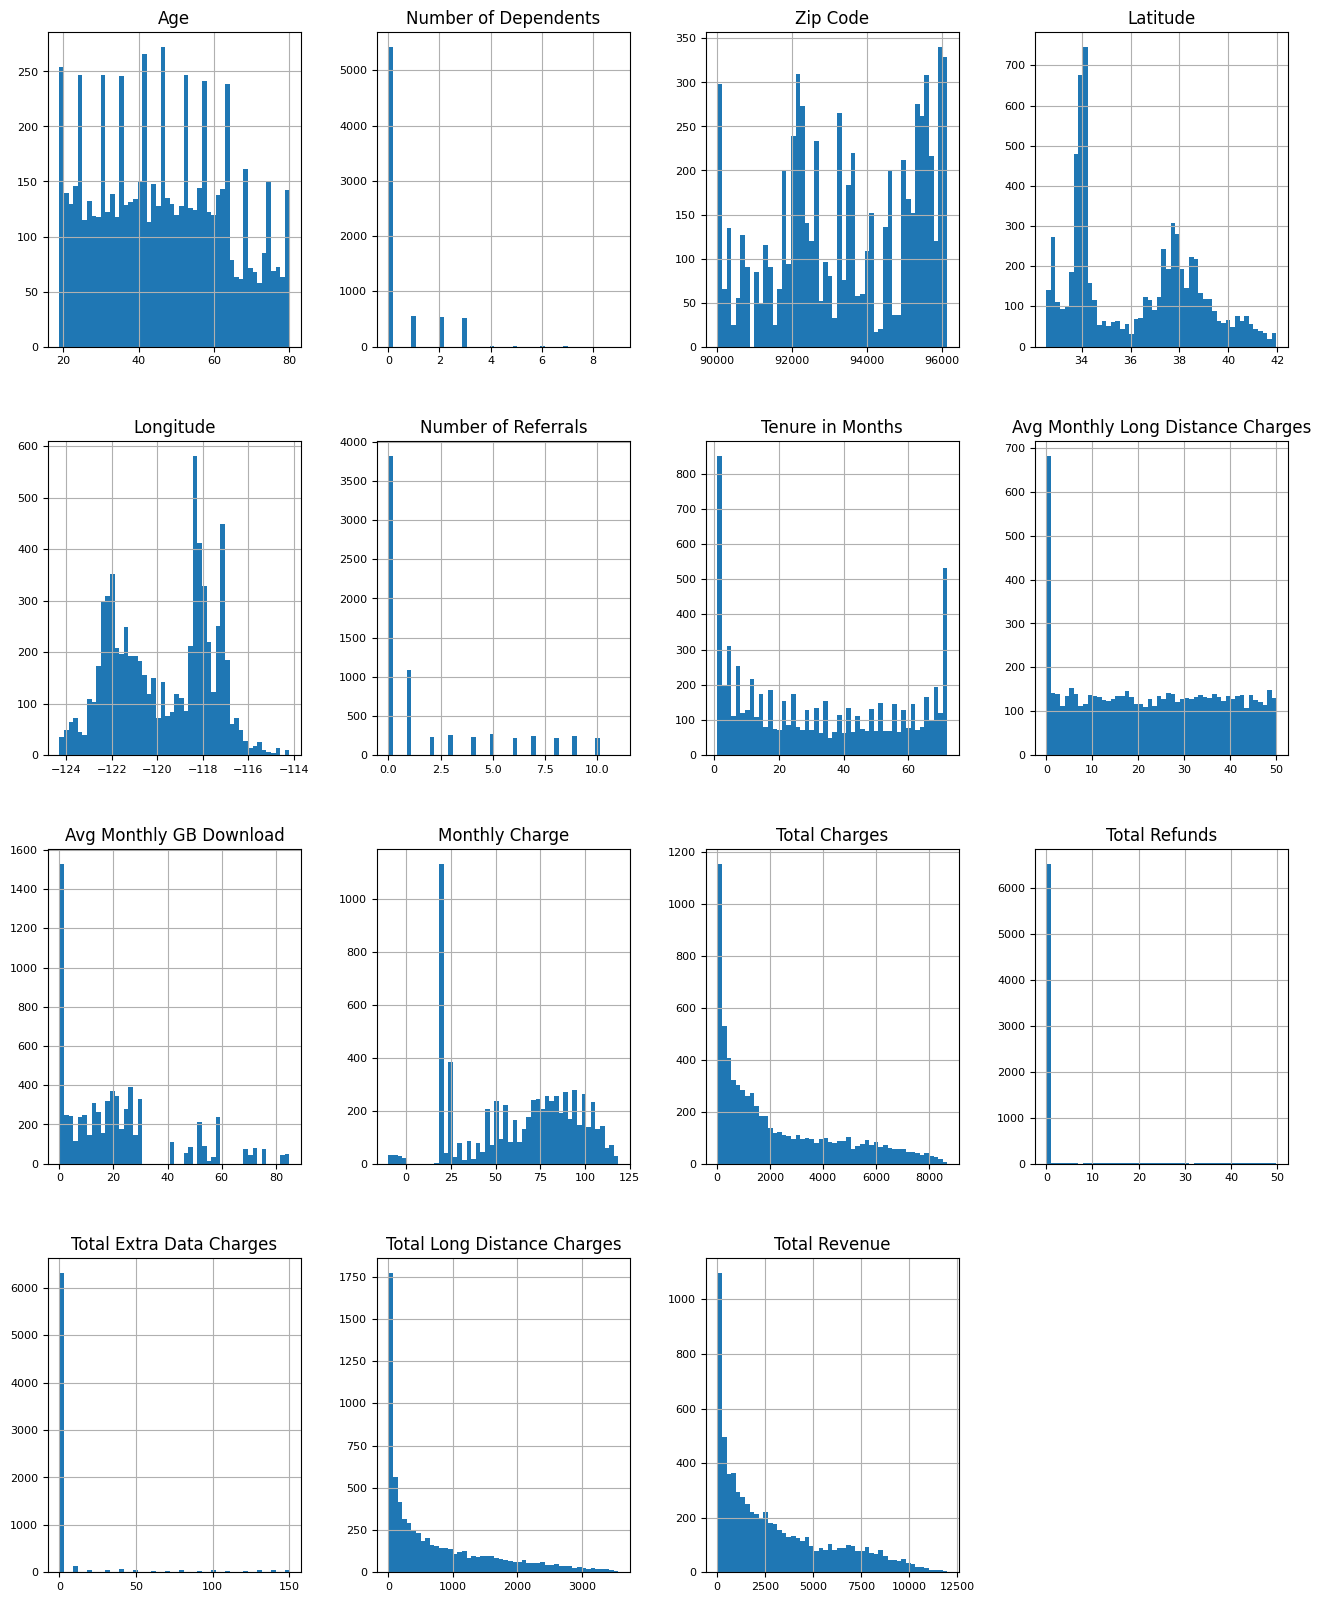

In [770]:
data_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

In [771]:
import seaborn as sns

<Axes: >

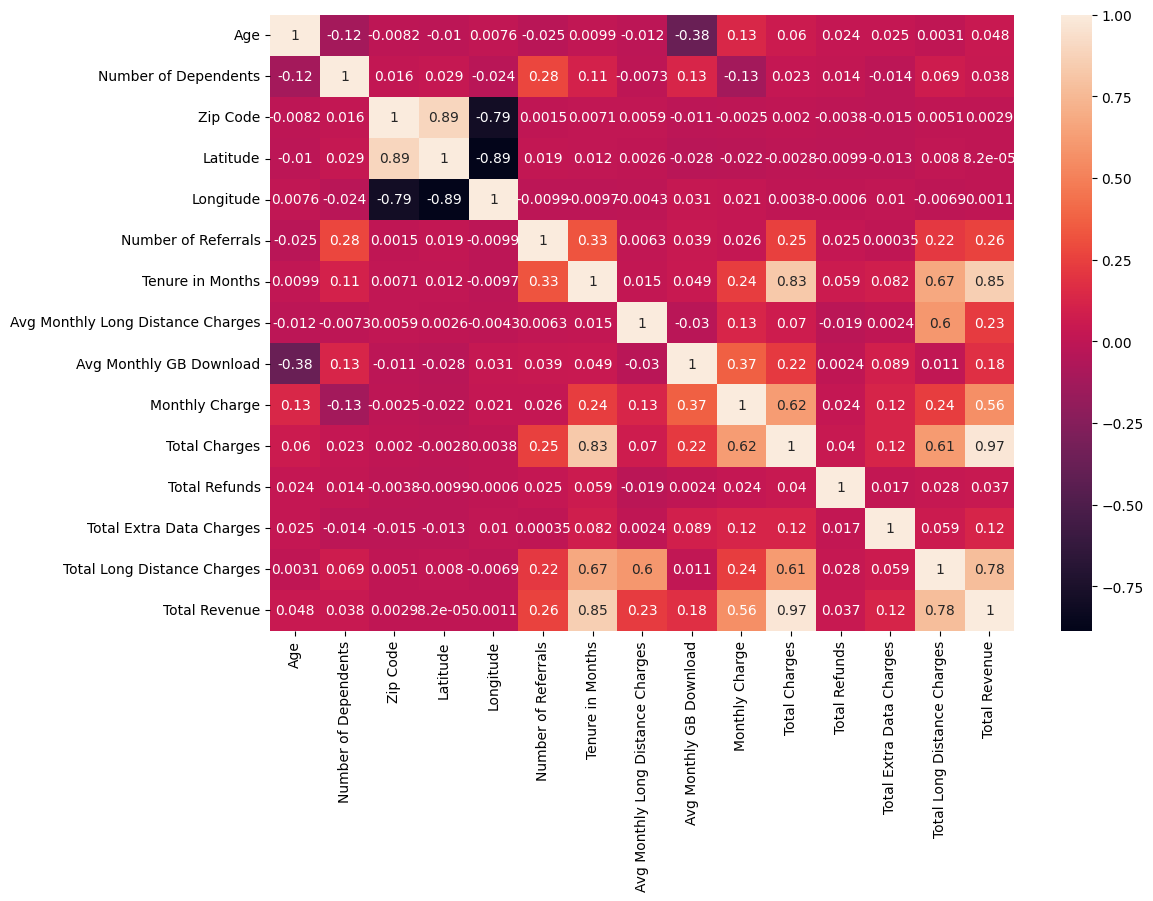

In [772]:
plt.figure(figsize=(12,8))
sns.heatmap(data1[[col for col in data1.select_dtypes(include=['int64','Float64',])]].corr(),annot=True)

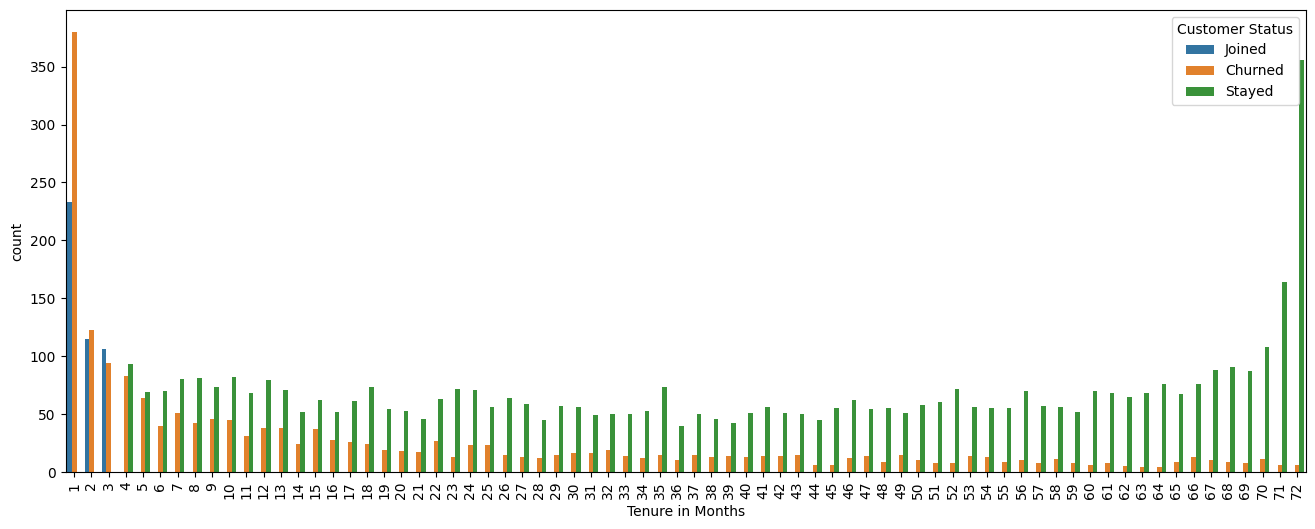

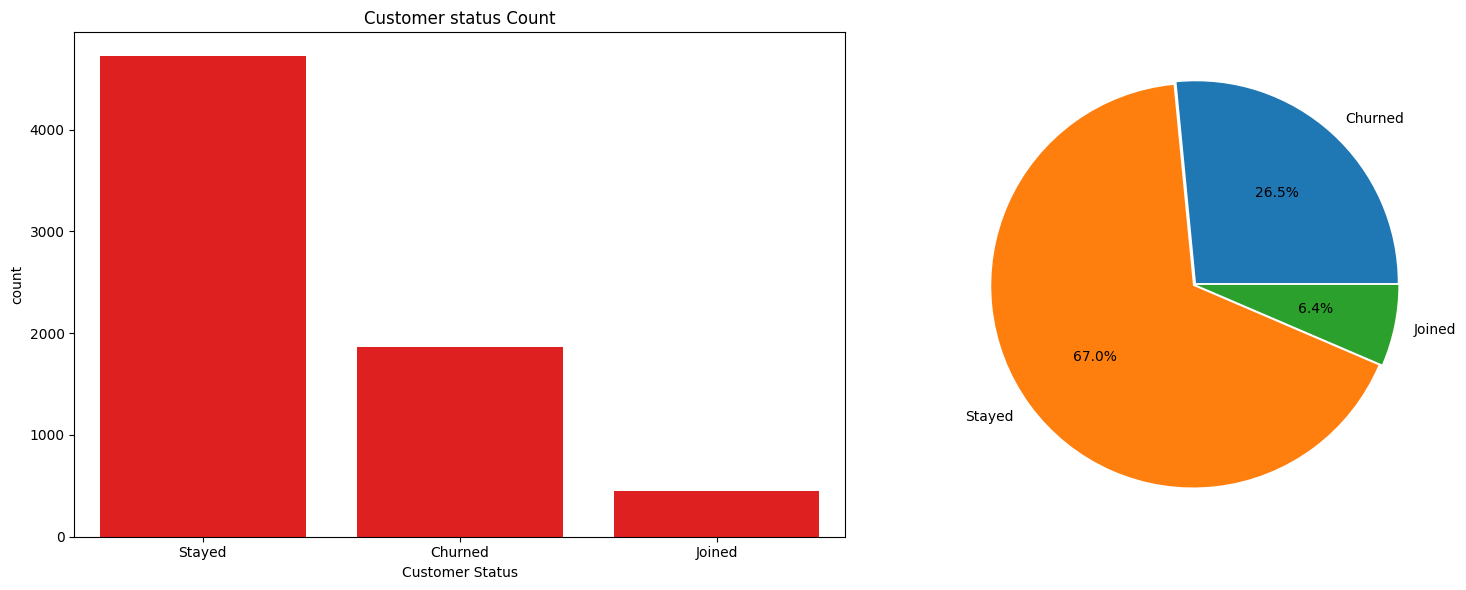

In [773]:
plt.figure(figsize=(16,6))
sns.countplot(data=data1,x='Tenure in Months',hue='Customer Status')
plt.xticks(rotation=90)

fig, axp = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=data1,x='Customer Status',color='red',ax=axp[0])
axp[0].set_title('Customer status Count')
churn = data1[data1['Customer Status'] == 'Churned']
stay = data1[data1['Customer Status'] == 'Stayed']
joined = data1[data1['Customer Status'] == 'Joined']

sums = [len(churn),len(stay),len(joined)]
lables = ['Churned','Stayed','Joined']

axp[1].pie(sums,labels=lables,autopct='%.1f%%',explode=[0.01,0.01,0.01])



plt.tight_layout()
plt.show()

In [774]:
data_visual = data1.drop(columns=['Customer ID','City', 'Zip Code', 'Latitude', 'Longitude','Paperless Billing'])
df =data1[data1['Customer Status'] == 'Joined']
df['Customer Status'].count()
data_visual = data_visual[data_visual['Customer Status'] != 'Joined']

* Removing the records of customers who have recently joined, as their data is insufficient to draw any meaningful conclusions regarding their decision-making.


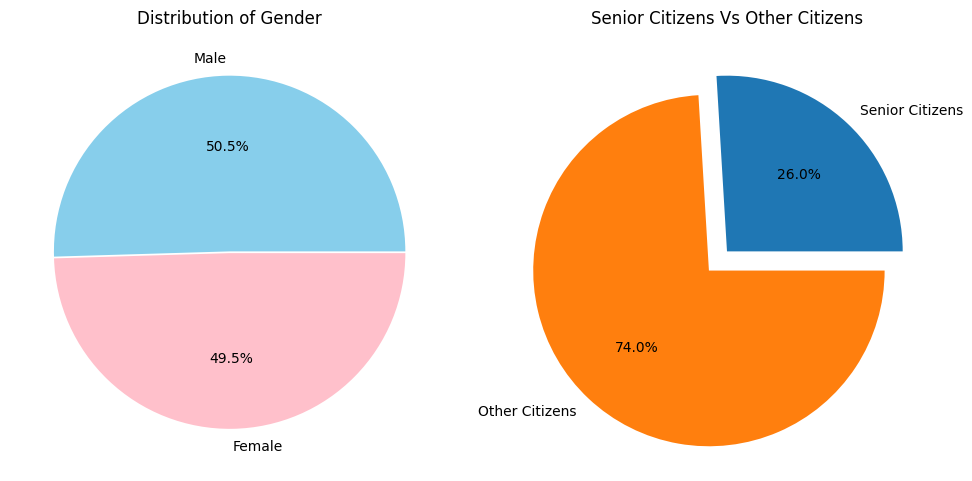

In [775]:
data_visual = data_visual[data_visual['Customer Status'] != 'Joined']
gender_counts = data1['Gender'].value_counts()

fig, axp = plt.subplots(1, 2, figsize=(10, 5))
axp[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'],explode=[0,0.01])
axp[0].set_title('Distribution of Gender')

senior_citizens = data_visual[data_visual['Age']>=60]
other_citiznes =  data_visual[data_visual['Age']<60]
counts=[len(senior_citizens),len(other_citiznes)]
lables = ['Senior Citizens','Other Citizens']
axp[1].pie(counts,labels=lables,autopct='%.1f%%',explode=[0,0.15])
axp[1].set_title('Senior Citizens Vs Other Citizens')
plt.tight_layout()
plt.show()


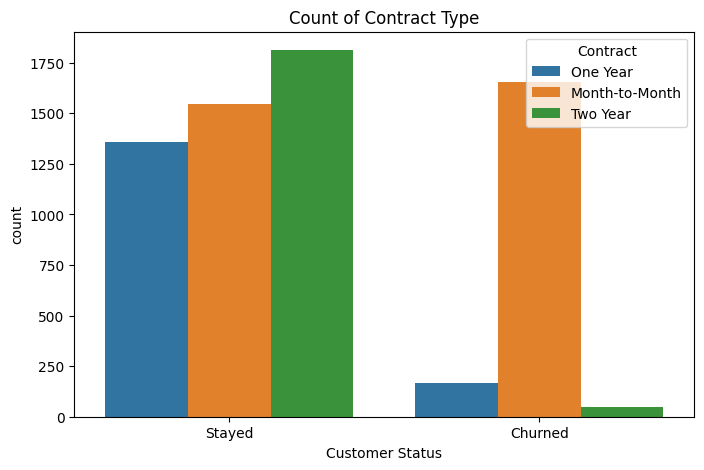

In [776]:
plt.figure(figsize=(8,5))
sns.countplot(data=data_visual,x='Customer Status',hue='Contract')
plt.title('Count of Contract Type')
plt.show()

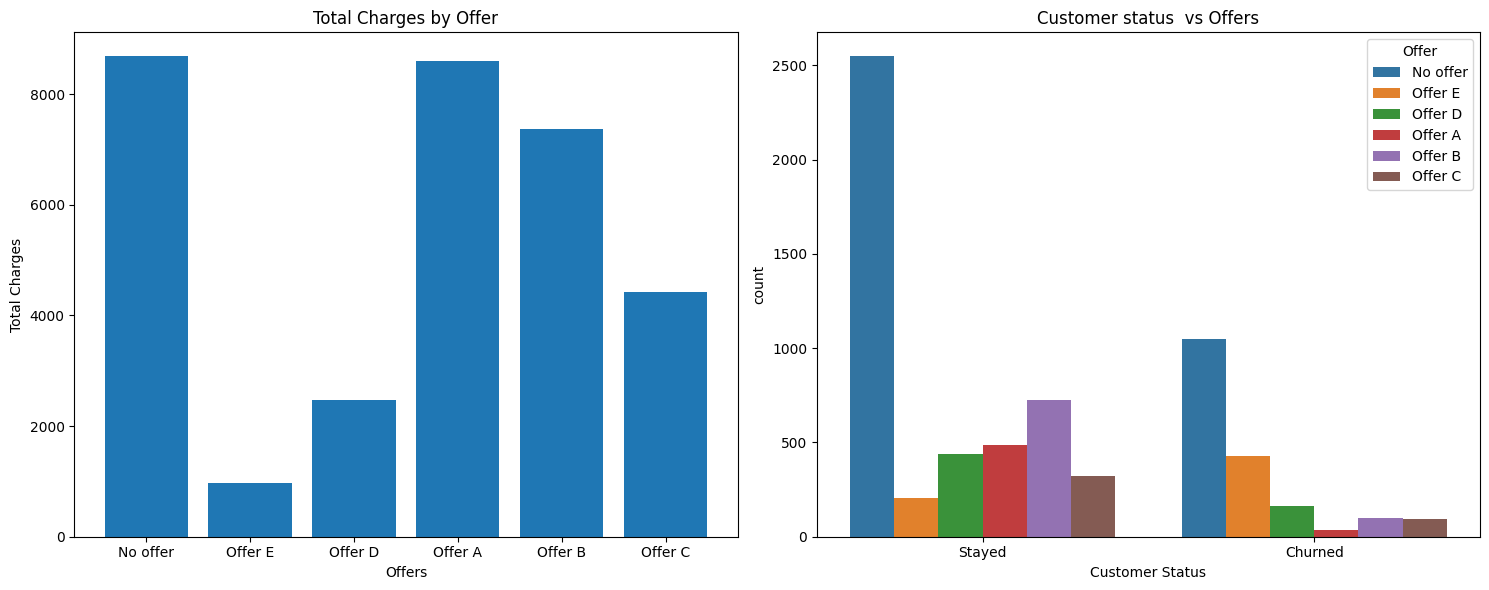

<Figure size 640x480 with 0 Axes>

In [777]:
total_revenue = data_visual.groupby('Customer Status')['Total Charges'].sum()
total_Offer= data_visual.groupby('Offer')['Total Revenue'].mean()

fig, axp = plt.subplots(1, 2, figsize=(15, 6))

axp[0].bar(data_visual['Offer'],height=data_visual['Total Charges'])
axp[0].set_title('Total Charges by Offer')
axp[0].set_xlabel('Offers')
axp[0].set_ylabel('Total Charges')

sns.countplot(data=data1[data1['Customer Status'] != 'Joined'],x='Customer Status',hue='Offer',ax=axp[1])
plt.title('Customer status  vs Offers')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()



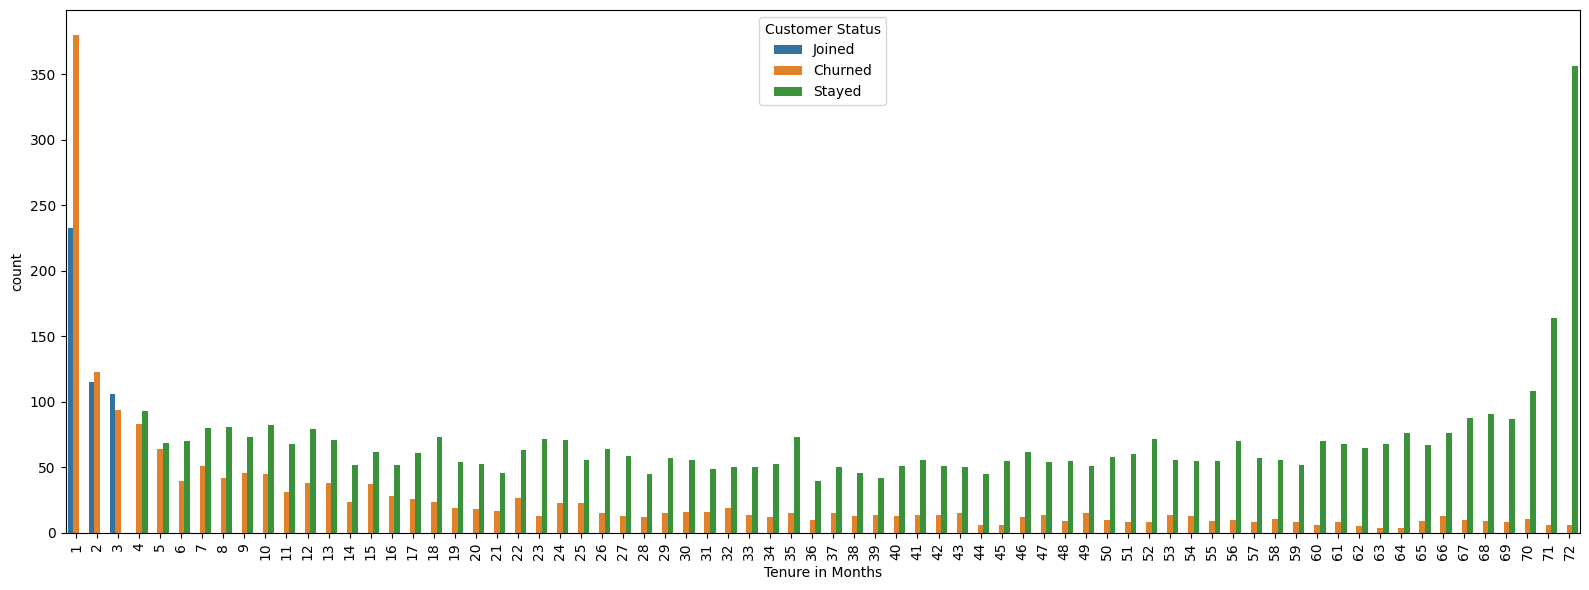

In [778]:
plt.figure(figsize=(16,6))
sns.countplot(data=data1,x='Tenure in Months',hue='Customer Status')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<Figure size 600x500 with 0 Axes>

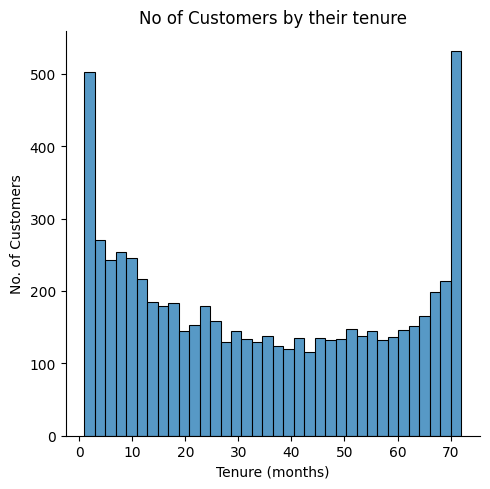

In [788]:
plt.figure(figsize=(6,5))
sns.displot(data_visual['Tenure in Months'],bins=int(180/5))
plt.xlabel('Tenure (months)')
plt.ylabel('No. of Customers')
plt.title('No of Customers by their tenure')
plt.tight_layout()
plt.show()

C:\Users\rvikr\AppData\Local\Temp\ipykernel_9976\3672314432.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(data=data_visual,x=data1['Customer Status'] ,hue=data_visual['Internet Service'],color='orange')


<Axes: xlabel='Customer Status', ylabel='count'>

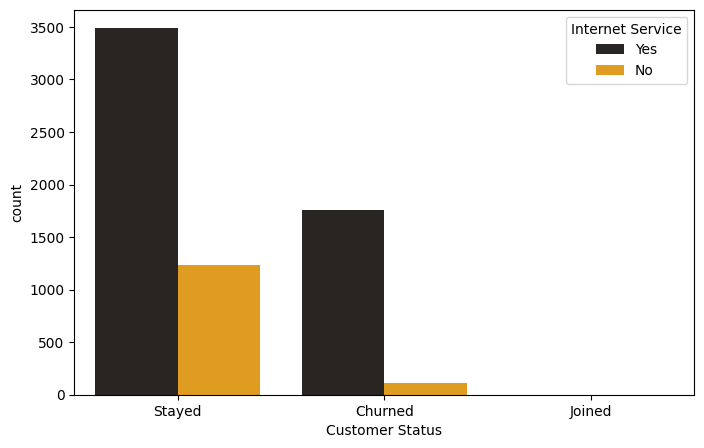

In [780]:
data_visual['Internet Service'].unique()
data_visual =data_visual[data_visual['Customer Status'] !='Joined']
plt.figure(figsize=(8,5))
sns.countplot(data=data_visual,x=data1['Customer Status'] ,hue=data_visual['Internet Service'],color='orange')

<Axes: >

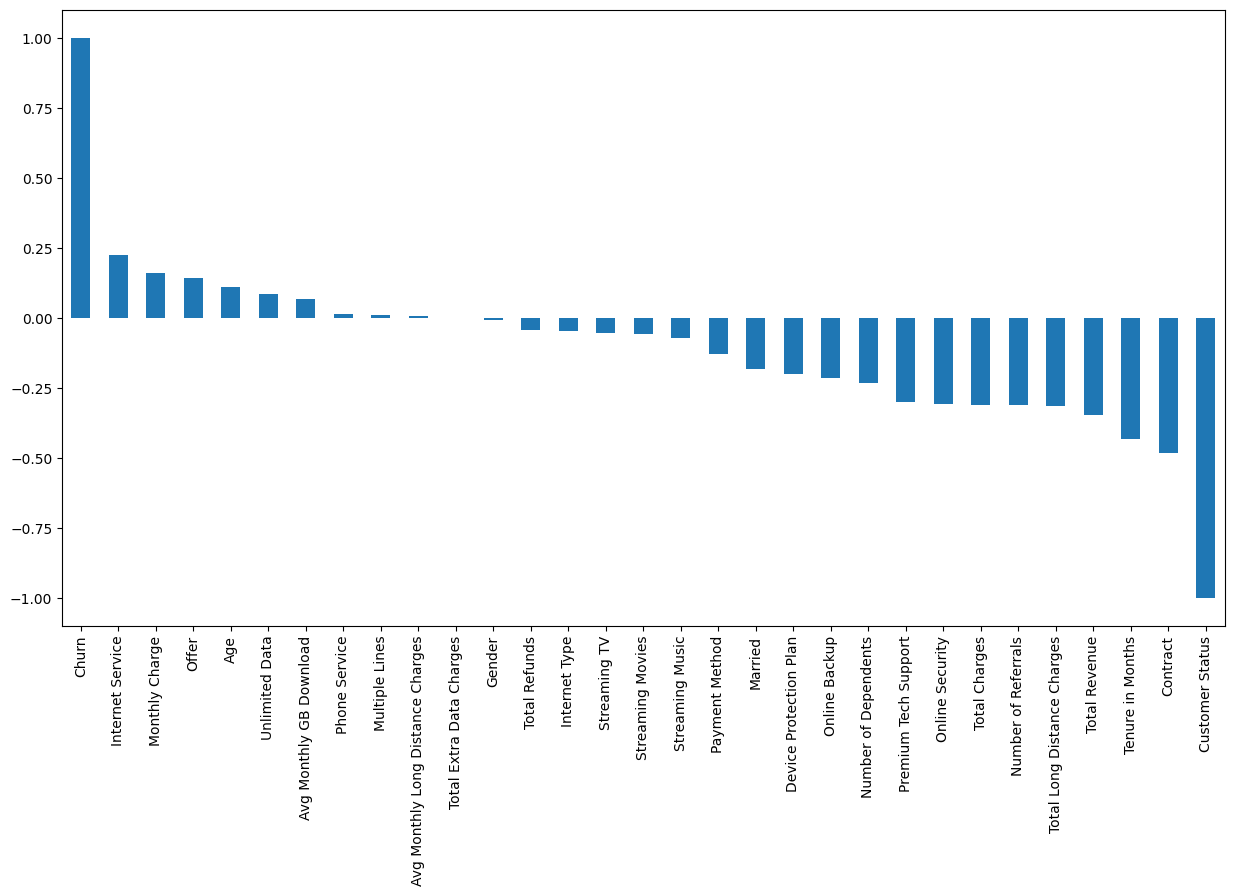

In [651]:
encoded_data = data_visual
encoded_data['Churn'] = encoded_data['Customer Status'] 
encoded_data['Churn'] = encoded_data['Churn'].apply(lambda x: 1 if x == 'Churned'  else 0)


from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()

for i in encoded_data.columns:
    encoded_data[i] = Label_encoder.fit_transform(encoded_data[i])

encoded_data.drop(columns='Customer Status')

encoded_data_dummies = pd.get_dummies(encoded_data)
plt.figure(figsize=(15,8))
encoded_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


## Key Insight
### Gender Distributions
* In the dataset, the usage of the telecom service is nearly equal between male and female customers, with no representation of a third gender.
### Total Charges by Offer
* The highest proportion of stayed customers did not subscribe to any offers, which may indicate that the offers are either overpriced or unfamiliar.
* The charges for customers with no offer and those who subscribed to offer A are nearly Equal.
* A higher proportion of churned customers subscribed to the potentially overpriced Offer A compared to other offers, excluding those with no offer. Among the customers who stayed, the usage of Offer A is lower than that of other offers.
### Contract Type
* Customers with month-to-month contracts exhibit a higher churn rate.


# 5. Feature Engineering

In [652]:
model_df= data1.loc[data1['Customer Status'] != 'Joined']

In [653]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   object 
 1

In [654]:
model_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [655]:
model_df= model_df.drop(columns=['Customer ID','City', 'Zip Code', 'Latitude', 'Longitude'])

In [656]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [657]:
for col in model_df.select_dtypes(include= 'object').columns:
    model_df[col]=Label_Encoder.fit_transform(model_df[col])

In [658]:
model_df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,2,9,0,1,42.39,0,...,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,0,9,0,1,10.69,2,...,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,0,4,5,1,33.65,0,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,1,13,4,1,27.82,0,...,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,3,3,0,1,7.38,0,...,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [659]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   int32  
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   int32  
 3   Number of Dependents               6589 non-null   int64  
 4   Number of Referrals                6589 non-null   int64  
 5   Tenure in Months                   6589 non-null   int64  
 6   Offer                              6589 non-null   int32  
 7   Phone Service                      6589 non-null   int32  
 8   Avg Monthly Long Distance Charges  6589 non-null   float64
 9   Multiple Lines                     6589 non-null   int32  
 10  Internet Service                   6589 non-null   int32  
 11  Internet Type                      6589 non-null   int32  
 1

# 6.Model Building and Evaluation

In [716]:
x = model_df.drop('Customer Status',axis=1)
y = model_df['Customer Status']

In [717]:
print(x.shape)
print(y.shape)

(6589, 30)
(6589,)


In [718]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [719]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

In [720]:
model_LR = LogisticRegression()
model_RF = RandomForestClassifier()

model_LR.fit(x_train,y_train)


C:\Users\rvikr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# i). Random forest Classifier

In [721]:
from sklearn.metrics import recall_score , precision_score ,classification_report

In [722]:
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [723]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    'criterion':['gini','entropy'],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

"from sklearn.model_selection import GridSearchCV\nparam_grid ={\n    'criterion':['gini','entropy'],\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': ['auto', 'sqrt'],\n    'bootstrap': [True, False]\n} "

In [724]:
grid_search = GridSearchCV(estimator=model_RF,param_grid=param_grid,cv=5,n_jobs=-1)

'grid_search = GridSearchCV(estimator=model_RF,param_grid=param_grid,cv=5,n_jobs=-1)'

In [725]:
grid_search.fit(x_train,y_train)

'grid_search.fit(x_train,y_train)'

In [726]:
print(grid_search.best_params_)

'print(grid_search.best_params_)'

In [727]:
Random_Forest_Classifier = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=2,min_samples_split=10,n_estimators=100)

In [728]:
Random_Forest_Classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)

In [729]:
from sklearn.metrics import accuracy_score ,r2_score
y_pred_RF = Random_Forest_Classifier.predict(x_test)
accuracy_score_RF=accuracy_score(y_test,y_pred_RF)
precision_score_RF = precision_score(y_test,y_pred_RF)
recall_score_RF = recall_score(y_test,y_pred_RF)

print('The accuracy score is  : {:.2f}'.format(accuracy_score_RF))
print('The precision score is : {:.2f}'.format(precision_score_RF))
print('The Recall score is    : {:.2f}'.format(recall_score_RF))
print(classification_report(y_test,y_pred_RF))


The accuracy score is  : 0.87
The precision score is : 0.87
The Recall score is    : 0.95
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       383
           1       0.87      0.95      0.91       935

    accuracy                           0.87      1318
   macro avg       0.86      0.81      0.83      1318
weighted avg       0.87      0.87      0.86      1318



# ii). Logistic Regressor

In [730]:
y_pred_LR = model_LR.predict(x_test)
accuracy_score_LR=accuracy_score(y_test,y_pred_LR)

In [731]:
precision = precision_score(y_test,y_pred_LR)
recall = recall_score(y_test,y_pred_LR)

In [732]:
print('The accuracy score is  : {:.2f}'.format(accuracy_score_LR))
print('The precision score is : {:.2f}'.format(precision))
print('The Recall score is    : {:.2f}'.format(recall))
print(classification_report(y_test,y_pred_LR))

The accuracy score is  : 0.81
The precision score is : 0.85
The Recall score is    : 0.89
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       383
           1       0.85      0.89      0.87       935

    accuracy                           0.81      1318
   macro avg       0.77      0.75      0.76      1318
weighted avg       0.80      0.81      0.81      1318



In [733]:
from sklearn.metrics import roc_curve 

y_score_LR = model_LR.predict_proba(x_test)[:,1]
y_score_RF = model_RF.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_score_LR)
fpr2,tpr2,thresholds2 = roc_curve(y_test,y_score_RF)

### ROC curve 
* ROC Curve for Random Forest Rgressor and Logistics Regressor

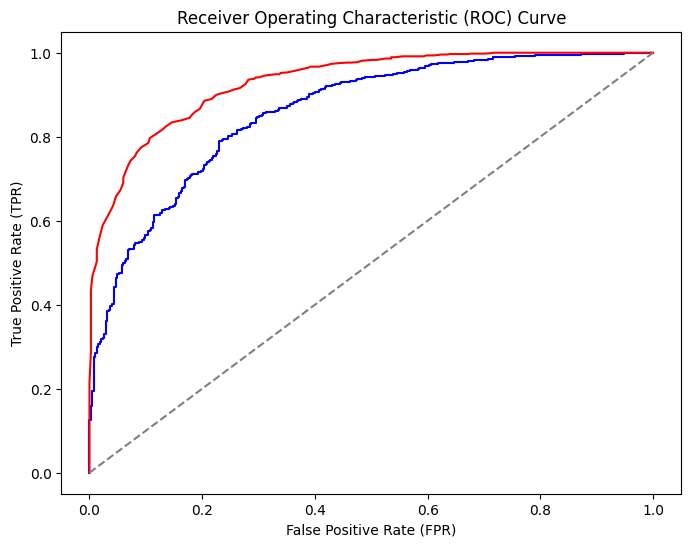

In [734]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue')
plt.plot(fpr2, tpr2, color='Red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
'''plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])'''
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

* Feature Importance

In [735]:
feature_importances = model_RF.feature_importances_
features = data_visual.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature  Importance
5                    Tenure in Months    0.131651
21                           Contract    0.109697
25                      Total Refunds    0.097777
29                    Customer Status    0.087442
24                      Total Charges    0.075765
28                      Total Revenue    0.059878
1                                 Age    0.057916
4                 Number of Referrals    0.056610
8   Avg Monthly Long Distance Charges    0.043756
12            Avg Monthly GB Download    0.043557
13                    Online Security    0.029279
3                Number of Dependents    0.026383
16               Premium Tech Support    0.023658
6                               Offer    0.019482
11                      Internet Type    0.015878
23                     Monthly Charge    0.012843
15             Device Protection Plan    0.010837
22                     Payment Method    0.010603
14                      Online Backup    0.010579
